**Analysebericht: Genre Klassifikation von Liedern**

Spotify gehört zu einem der größten Audio-Streaming Anbietern weltweit und bietet eine große Auswahl an Musik. Damit jeder Nutzer die passende Musik zu seinem Geschmack findet, bietet Spotify zu diversen Musikgenres eine Auswahl von generierten Playlisten an. Zusätzlich bietet Spotify die Möglichkeit an, zu jedem Lied sich analytische Daten abzufragen. 

Ziel dieses Berichtes ist es, ein Modell zu entwickeln, welches anhand der analytischen Daten eines Liedes, dieses einem Genre zuordnen kann. Für die Erhebung der Daten wurde ein Python Skript geschrieben, welches die nötigen Informationen von Spotify abgreift und in einer CSV-Datei speichert (siehe **fetchdata.ipynb** für weitere Informationen).

**Multiclass Classification**

Die Lieder sollen anhand ihrer Analysedaten einem Genre zugeordnet werden. Da es mehr als zwei Genres gibt, handelt es sich um Modell der Multiclass Classification. Dies ist eine Technik des überwachten maschinellen lernen. 

**Voreinstellung**

Falls nötig muss zuerst das Modul PyCaret installiert werden und Falls das Programm in Google Colab ausgeführt werden soll, muss dies auch erst aktiviert werden. Anschließend werden die nötigen Module *pandas*, *numpy* und *pyplot* geladen. 

In [1]:
#Installierung für Pycaret
#pip install pycaret
#für Google Colab 
#!pip install pycaret

In [2]:
#für Google Colab 
#from pycaret.utils import enable_colab
#enable_colab()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Datensatz**

Wie bereits erwähnt wurde der Datensatz selbst erhoben mit der Hilfe eines Python Skriptes. Die Daten wurden dabei von Spotify zur Verfügung gestellt. Der Datensatz beinhaltet 9416 Einträge mit Spalten. Die Zielvariable *genre* besitzt dabei acht verschiedene Ausprägungen.

Beschreibung aller Spalten [[Quelle 1](https://developer.spotify.com/documentation/web-api/reference/%23/operations/get-audio-features), Abruf am 11.07.2022]:

- **Id:** Eindeutige ID eines Liedes
- **Titel:** Der Musiktitel eines Liedes
- **Genre:** Das Genre eines Liedes
- **Danceability:** beschreibt wie geeignet ein Lied zum Tanzen ist, basierend auf einer Kombination aus musikalischen Elementen wie Tempo oder Rhythmusstabilität. Bei 0 eignet sich das Lied am wenigsten zum Tanzen, bei 1 ist der Wert maximal.
- **Energy:** Stellt ein Maß für die Intensität und Aktivität da. Bei 0 ist der Wert minimal und bei 1 maximal 
- **Key:** Gibt die Tonart eines Liedes an, kodiert als Zahl. Beispiel: 0 = C, 1 = C#, 2 = D, und so weiter. Bei einem Wert von -1 konnte keine Tonart festgestellt werden
- **Loudness:** beschreibt die Gesamtlautstärke eines Liedes in Dezibel. Der Wert wird über das Gesamte Lied gemittelt. Die Werte liegen typischerweise zwischen -60 und 0.
- Mode: Gibt die Modalität eines Liedes an (Dur = 1 und Moll = 0). 
- **Speechiness:** Beschreibt das Vorhandensein von gesprochenen Wörtern eines Liedes. Ab einen Wert von 0,66 handelt es sich wahrscheinlich um ein Werk in dem ausschließlich gesprochen wird zum Beispiel ein Hörbuch.
- **Acousticness:** Ein Intervall zwischen 0 und 1, ob das Lied akustisch ist. Je näher der Wert an 1, desto höher ist die Wahrscheinlichkeit. 
- **Instrumentalness:** Beschreibt, ob das Lied Gesang enthält. Je näher der Wert an 1 liegt, desto größer ist die Wahrscheinlichkeit, dass das Lied keinen Gesang enthält** 
- **Liveness:** Beschreibt, ob das Lied live aufgenommen wurde oder in einem Studio. Je höher der Wert ist, desto größer ist Wahrscheinlichkeit, dass das Lied live aufgenommen wurde
- **Valence:** Beschreibt die Positivität eines Liedes. Je näher der Wert an 1 ist, desto fröhlicher kling das Lied, während es bei 0 eher trauriger klingt.
- **Tempo:** Beschreibt das Tempo eines Liedes in Beats pro Minute (BPM).
- **Duration\_ms:** Beschreibt die Länge eines Liedes in Millisekunden.
- **Time\_signature:** Beschreibt den Takt eines Liedes und wie viele schläge in jedem Takt sind. Der wert geht von 3 bis 7 (3/4 Takt bis 7/4 Takt).

In [4]:
df = pd.read_csv("music.CSV")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9416 non-null   object 
 1   titel             9415 non-null   object 
 2   genre             9416 non-null   object 
 3   danceability      9416 non-null   float64
 4   energy            9416 non-null   float64
 5   key               9416 non-null   int64  
 6   loudness          9416 non-null   float64
 7   mode              9416 non-null   int64  
 8   speechiness       9416 non-null   float64
 9   acousticness      9416 non-null   float64
 10  instrumentalness  9416 non-null   float64
 11  liveness          9416 non-null   float64
 12  valence           9416 non-null   float64
 13  tempo             9416 non-null   float64
 14  duration_ms       9416 non-null   int64  
 15  time_signature    9416 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory 

In [5]:
df.head()

,id,titel,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,001U2oRRZXrLbeOJMduXSc,PAPARAZZI,party,0.841,0.558,4,-5.028,1,0.1880,0.128000,0.003610,0.1020,0.516,75.005,148000,4
1,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,rock,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,222973,4
2,00FRYCC99BHS1ewIqteTwh,hunger,indie_alt,0.586,0.740,2,-6.132,1,0.0398,0.311000,0.000353,0.0878,0.473,145.871,191297,4
3,00OQVltax4uGNaXHfAlj2Y,Honey,alternative,0.434,0.758,1,-9.313,1,0.0346,0.000109,0.110000,0.2090,0.245,100.030,183642,4
4,00QhDAu0EO28Knjq4C3Nhk,Vergessen,rock,0.558,0.829,6,-5.426,1,0.0354,0.001930,0.000031,0.5160,0.961,160.031,141022,4


In [6]:
# Decodierung der Werte für die Variable "Key"
df.loc[df["key"]==-1,"key"] = None
df.loc[df["key"]==0,"key"] = "C"
df.loc[df["key"]==1,"key"] = "C#"
df.loc[df["key"]==2,"key"] = "D"
df.loc[df["key"]==3,"key"] = "D#"
df.loc[df["key"]==4,"key"] = "E"
df.loc[df["key"]==5,"key"] = "F"
df.loc[df["key"]==6,"key"] = "F#"
df.loc[df["key"]==7,"key"] = "G"
df.loc[df["key"]==8,"key"] = "G#"
df.loc[df["key"]==9,"key"] = "A"
df.loc[df["key"]==10,"key"] = "Bb"
df.loc[df["key"]==11,"key"] = "B"

Anhand der Gruppierung der Daten nach dem Genre, lässt sich erkenne, dass die Daten nicht ausbalanciert sind. Es gibt es viel weniger Lieder, die mit dem Genre Hip-Hop klassifiziert wurden, als Lieder im Genre Rock. Das bedeutet die einzelnen Klassen, können nicht gleichmäßig repräsentiert werden.

In [7]:
df.groupby("genre").size()

genre
alternative    1191
edm_dance      1195
hiphop          847
indie_alt      1328
metal          1332
party          1087
pop            1012
rock           1424
dtype: int64

<AxesSubplot:title={'center':'Anzahl der Lieder pro Genre'}, xlabel='Genre', ylabel='Anzahl'>

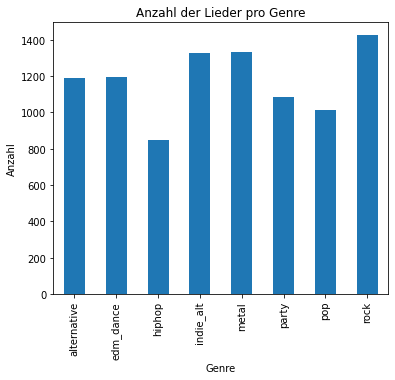

In [8]:
genres = df.groupby("genre").size()
genres.plot(kind="bar",title="Anzahl der Lieder pro Genre",ylabel="Anzahl",xlabel="Genre",figsize=(6,5))

In [9]:
#Aufspliten des Datensatzes in Daten die für Training genutzt werden und die fürs Testen verwendet werde
def split_data(df):
    
    data = df.sample(frac=0.9, random_state=786)
    data_unseen = df.drop(data.index)

    data.reset_index(drop=True, inplace=True)
    data_unseen.reset_index(drop=True, inplace=True)

    print('Data for Modeling: ' + str(data.shape))
    print('Unseen Data For Predictions: ' + str(data_unseen.shape))
    return (data,data_unseen)

In [10]:
data, data_unseen = split_data(df)

Data for Modeling: (8474, 16)
Unseen Data For Predictions: (942, 16)


*Einstellen von PyCaret** 

Um das Modell später validieren zu können, wird der Datensatz zufällig aufgeteilt. 90% der Daten werden für das Trainieren des Modelles genutzt und die restlichen 10% der Daten werden später für die vorhersage genutzt. Dazu wurde die Funktion *split\_data* geschrieben, zum Aufteilen eines Dataframes.

Die *setup()* Funktion initialisiert die PyCaret Umgebung und erstellt automatisch eine pipeline für die Daten, damit sie zur Modellierung genutzt werden können. Die Funktion benötigt zwingend den Datensatz und die Zielvariable als Parameter. Hier ist die Zielvariable *genre***.** Zusätzlich wird eine *session\_id* mitübergeben, damit das Modell reproduziert werden kann. Außerdem sollen die Variablen *ID* und *Titel* nicht für die Modellierung genutzt werden, da diese Variablen nur für die Zuordnung des Liedes verantwortlich ist und sie keinen Nährwert für die Analyse geben. Dadurch kann die Performance des Modelles verbessert werden. Da die Daten nicht ausbalanciert sind, wird zusätzlich angegeben, dass PyCaret sich um das Problem kümmern soll. PyCaret erstellt synthetische Daten, aus den unter repräsentativeren Daten, um den Datensatz auszubalancieren. 

Nach dem Setup hat PyCaret die Features ihren Skalen zugeteilt und die Kategorischen Variablen encoded. Außerdem wurden die Daten Transformiert und in einen Trainingsdatensatz und einem Testdatensatz aufgeteilt.

In [11]:
from pycaret.classification import *

In [12]:
exp_mclf101 = setup(data,target="genre",session_id=21, ignore_features = ["id","titel"],fix_imbalance=True)

,Description,Value
0,session_id,21
1,Target,genre
2,Target Type,Multiclass
3,Label Encoded,"alternative: 0, edm_dance: 1, hiphop: 2, indie_alt: 3, metal: 4, party: 5, pop: 6, rock: 7"
4,Original Data,"(8474, 16)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


**Modell Vergleich**

Mit der *compare\_models()* wird einmal die Perfomance aller Modelle bestimmt und alle Modelle werden mittels cross validation (fold = 5) evaluiert. Die größte Genauigkeit mit 0,4753 konnte bei dem *Random Forest Classifier* Modell erzielt werden gefolgt von dem *Gradient Boosting Classifier* Modell mit einer Genauigkeit von 0,4738 und dem Light Gradient Boosting Machine Modell mit einer Genauigkeit von 0,4729. Letzteres hat den besten F-Score erreicht mit 0,4673. Da die Werte der Evaluation aller drei Modelle nah beieinander liegen, werden die Modelle erstellt.

In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.4753,0.8374,0.4777,0.4695,0.4654,0.3990,0.4005,0.5230
gbc,Gradient Boosting Classifier,0.4738,0.8434,0.4741,0.4670,0.4651,0.3971,0.3984,5.7740
lightgbm,Light Gradient Boosting Machine,0.4729,0.8424,0.4726,0.4669,0.4673,0.3957,0.3964,0.8000
et,Extra Trees Classifier,0.4485,0.8215,0.4508,0.4376,0.4363,0.3681,0.3696,0.5450
lda,Linear Discriminant Analysis,0.4058,0.7929,0.4049,0.3998,0.3934,0.3189,0.3208,0.0490
ada,Ada Boost Classifier,0.3950,0.7828,0.4012,0.3726,0.3641,0.3082,0.3135,0.2370
ridge,Ridge Classifier,0.3932,0.0000,0.3964,0.3799,0.3612,0.3048,0.3103,0.0260
dt,Decision Tree Classifier,0.3418,0.6237,0.3402,0.3445,0.3421,0.2456,0.2458,0.0570
nb,Naive Bayes,0.2659,0.6948,0.2797,0.3091,0.2505,0.1673,0.1743,0.0280
qda,Quadratic Discriminant Analysis,0.1637,0.6015,0.1693,0.2340,0.1026,0.0485,0.0775,0.0350


**Modell Erstellung**

**Random Forest Classifer (rf)**

Das rf Modell erzielte eine durchschnittliche Genauigkeit der richtigen Klassifizierung der Daten von 0.4753. Außerdem einen Recall (Anzahl der wahren positiven Einordnungen geteilt durch alle positiven Einordnungen) von 4,4777, sowie eine Precision von 0,4654 (Anzahl aller wahren Positiven Einordnungen geteilt durch alle wahren positiven Einordnungen plus aller falsch negativen Einordnungen).

In [14]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.8468,0.5061,0.4892,0.4858,0.4273,0.4293
1,0.4570,0.8199,0.4637,0.4521,0.4478,0.3782,0.3796
2,0.4857,0.8489,0.4919,0.4834,0.4794,0.4119,0.4132
3,0.4874,0.8414,0.4894,0.4829,0.4798,0.4128,0.4140
4,0.4435,0.8199,0.4441,0.4364,0.4310,0.3623,0.3643
5,0.4570,0.8330,0.4572,0.4509,0.4494,0.3784,0.3795
6,0.5126,0.8605,0.5118,0.5156,0.5019,0.4418,0.4443
7,0.4587,0.8356,0.4625,0.4583,0.4498,0.3799,0.3816
8,0.4739,0.8371,0.4739,0.4654,0.4651,0.3970,0.3980


**Grandient Boosting Classifier (gbc)**

Das gbc Modell erzielt im vergleich zum rf ein Modell eine leicht schlechtere Genauigkeit, sowie einen Recall und Precision.

In [15]:
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5017,0.8512,0.5052,0.4926,0.4895,0.4291,0.4308
1,0.4553,0.8359,0.4545,0.4460,0.4445,0.3760,0.3775
2,0.4823,0.8488,0.4858,0.4765,0.4752,0.4078,0.4090
3,0.4975,0.8503,0.4993,0.4933,0.4918,0.4244,0.4253
4,0.4418,0.8311,0.4421,0.4374,0.4332,0.3606,0.3621
5,0.4519,0.8361,0.4501,0.4443,0.4454,0.3722,0.3729
6,0.5008,0.8581,0.5008,0.4914,0.4895,0.4279,0.4296
7,0.4519,0.8396,0.4506,0.4558,0.4480,0.3720,0.3733
8,0.4840,0.8420,0.4848,0.4770,0.4759,0.4089,0.4099


**Light Gradient Boosting Machine** **(lgbm)**

Das lgbm Modell ist ebenfalls leicht schlechter als das rf Modell. Lediglich der F-Score ist besser beim lgbm Modell. 

In [16]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4916,0.8491,0.4935,0.4835,0.4854,0.4174,0.4180
1,0.4772,0.8310,0.4791,0.4737,0.4728,0.4008,0.4016
2,0.4739,0.8591,0.4736,0.4734,0.4723,0.3971,0.3975
3,0.4671,0.8500,0.4675,0.4607,0.4599,0.3892,0.3901
4,0.4621,0.8273,0.4634,0.4523,0.4542,0.3833,0.3840
5,0.4587,0.8364,0.4595,0.4520,0.4536,0.3797,0.3802
6,0.5025,0.8514,0.5042,0.5003,0.4968,0.4300,0.4311
7,0.4688,0.8427,0.4658,0.4658,0.4643,0.3904,0.3912
8,0.4772,0.8400,0.4737,0.4694,0.4716,0.4006,0.4011


**Modell Verbesserung**

Mit der *tune\_model()* Funktion können die Hyperparameter der Modelle angepasst werden, um somit die bestmöglichen Parameter der Modelle herauszufinden. 

In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4899,0.8477,0.4972,0.4871,0.4741,0.4160,0.4188
1,0.4519,0.8291,0.4604,0.4502,0.4352,0.3724,0.3751
2,0.4890,0.8566,0.4936,0.4908,0.4792,0.4156,0.4181
3,0.4823,0.8486,0.4856,0.4865,0.4746,0.4072,0.4092
4,0.4384,0.8364,0.4451,0.4337,0.4227,0.3577,0.3608
5,0.4553,0.8392,0.4544,0.4489,0.4445,0.3764,0.3781
6,0.4890,0.8629,0.4908,0.5033,0.4719,0.4150,0.4189
7,0.4486,0.8428,0.4500,0.4603,0.4370,0.3688,0.3715
8,0.4739,0.8414,0.4745,0.4734,0.4624,0.3975,0.3996


Nach dem Anpassen der Hyperparametern hab sich die Werte für das rf Modell verschlechtert und erzielt nur noch eine Genauigkeit von 0,4672. Ebenfalls hat der Wert für den Recall und Precision sich verschlechtert von 0.4777 auf 0,4705 und von 0,4695 auf 4,4673. 

In [18]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4882,0.8467,0.4955,0.4930,0.4723,0.4139,0.4169
1,0.4621,0.8340,0.4698,0.4646,0.4443,0.3839,0.3870
2,0.4840,0.8453,0.4877,0.4779,0.4713,0.4096,0.4121
3,0.5076,0.8499,0.5113,0.5182,0.4996,0.4361,0.4384
4,0.4587,0.8387,0.4642,0.4634,0.4399,0.3803,0.3843
5,0.4570,0.8355,0.4545,0.4519,0.4457,0.3781,0.3799
6,0.5076,0.8569,0.5082,0.5216,0.4922,0.4363,0.4398
7,0.4503,0.8386,0.4498,0.4578,0.4382,0.3705,0.3732
8,0.4806,0.8416,0.4838,0.4850,0.4631,0.4055,0.4085


Durch die Anpassung der Hyperparameter haben sich alle Werte beim gbc Modell leicht verbessert. 

In [19]:
tuned_lightgbm= tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4916,0.8469,0.4975,0.4787,0.4767,0.4178,0.4197
1,0.4486,0.8285,0.4541,0.4313,0.4310,0.3682,0.3703
2,0.4671,0.8416,0.4728,0.4603,0.4593,0.3903,0.3915
3,0.5008,0.8496,0.5019,0.4989,0.4923,0.4283,0.4299
4,0.4435,0.8267,0.4483,0.4390,0.4321,0.3632,0.3654
5,0.4486,0.8313,0.4508,0.4330,0.4355,0.3686,0.3699
6,0.5177,0.8537,0.5192,0.5148,0.5069,0.4479,0.4500
7,0.4705,0.8347,0.4725,0.4763,0.4612,0.3936,0.3959
8,0.4755,0.8383,0.4786,0.4623,0.4627,0.3997,0.4012


Bei dem lgbm Modell hat sich nach der Anpassung die Genauigkeit, Recall und der F-Score leicht verbessert, allerdings hat sie die Precision von 0,4669 leicht auf 0,4653 verschlechtert

Nach der Anpassung erzielt das gbc Modell die größte Genauigkeit.

**Plots**

In der Confusion Matrix lässt sich erkenne, dass Metal Songs am häufigsten richtig klassifiziert, werden konnten, während Lieder aus dem alternativen Genre am wenigsten korrekt klassifiziert wurden. Außerdem ist zu sehen, dass viele Lieder aus dem ‚Indie und dem Rock Genre fälschlicherweise als Alternativ klassifiziert wurden. Dies kann bedeuten, dass es eine gewisse Ähnlichkeit in den Genres gibt. Desweiterem ist zu erkennen, dass so gut wie keine Lieder aus dem Metal Genre, dem Hip-Hop und Pop Genre zugeordnet wurden. Ebenfalls wurden kaum Songs aus dem Hip-Hop und Pop Genre, dem Metal Genre zugeordnet. Dies kann bedeuten, dass es kaum Ähnlichkeiten innerhalb der Genres gibt. 


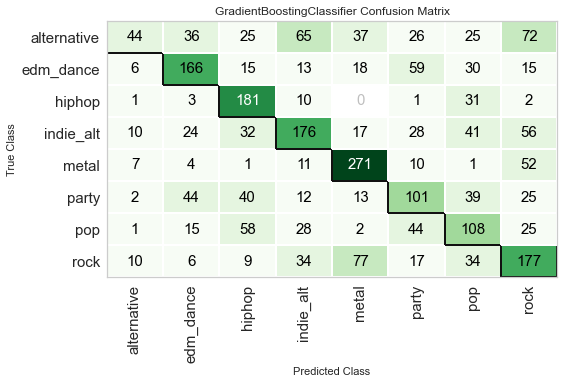

In [20]:
plot_model(tuned_gbc,plot="confusion_matrix")

In dem Class Report Diagramm, lässt sich erkennen, dass Hip-Hop den größten Anteil der tatsächlich Positiven Werte, die richtig identifiziert wurden. Das Modell konnte fast 80% aller Hip-Hop Lieder korrekt zuordnen. Ebenfalls konnte fast 76% aller Metal Lieder korrekt klassifiziert werden. Allerdings konnten gerade mal 13% aller Alternativ Lieder richtig zugeordnet werden. 

Rock, Pop und Party Lieder haben eine Precision von unter 50%, dabei liegt Rock bei knapp 42% und Pop wie auch Party Lieder liegen bei ungefähr 35%. Wenn das Modell ein Lied als Party Lied klassifiziert hat, handelt ist sich in gerade mal 34% der Fälle wirklich um ein Party Lied. 

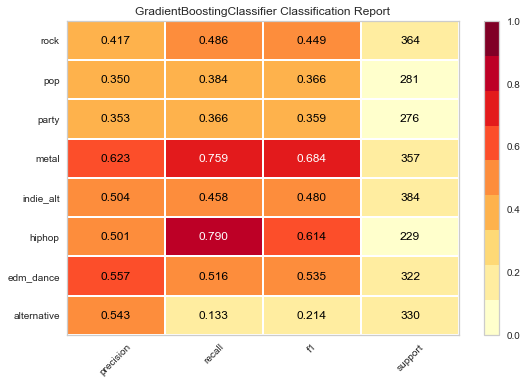

In [21]:
plot_model(tuned_gbc,plot="class_report")

Anhand des Feature Importance Diagramms lässt sich erkennen, dass die Danceability und die Accousticness am wichtigsten für eine Zuordnung ist, während die Liveness am irrelevantesten ist. 

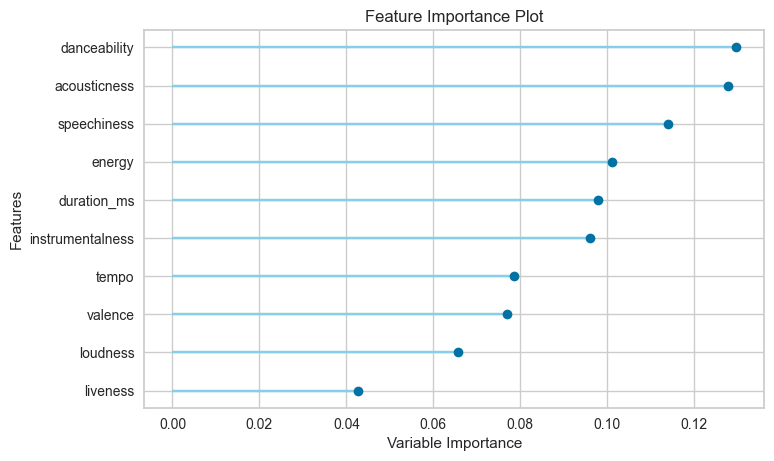

In [22]:
plot_model(tuned_gbc,plot="feature")

**Vorhersage:**

Mit der *predict\_model()* Funktion wurde eine Genauigkeit von 48% erzielt. Das heißt 48% aller Testdaten wurden richtig klassifiziert. Da die Genauigkeit nicht signifikant von der Modell Genauigkeit abweicht, ist dies ein Indikator dafür, dass kein overfitting vorliegt. 

In [23]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.4813,0.8453,0.4867,0.4865,0.4632,0.4066,0.4099


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_G,key_G#,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,genre,Label,Score
0,0.831,0.457,-8.844,0.1250,0.468000,0.546000,0.1260,0.5590,127.989998,158106.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,hiphop,hiphop,0.1535
1,0.422,0.901,-6.655,0.0631,0.000092,0.000007,0.5600,0.6730,112.445000,194587.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,metal,rock,0.1511
2,0.628,0.881,-7.754,0.0761,0.003320,0.000000,0.3970,0.5890,100.037003,207448.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,rock,rock,0.1406
3,0.511,0.947,-4.917,0.0457,0.004430,0.000000,0.1170,0.4940,104.045998,238518.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,metal,rock,0.1537
4,0.419,0.284,-15.409,0.0481,0.461000,0.006640,0.2630,0.1750,96.889000,270080.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,pop,indie_alt,0.1554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,0.268,0.867,-4.439,0.0922,0.017100,0.000000,0.1080,0.3010,149.953003,252800.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,edm_dance,metal,0.1553
2539,0.792,0.661,-5.305,0.0406,0.362000,0.041800,0.2520,0.6000,91.503998,110164.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,indie_alt,hiphop,0.1412
2540,0.864,0.755,-6.827,0.1010,0.338000,0.048300,0.0595,0.3270,98.815002,234040.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,indie_alt,hiphop,0.1467
2541,0.521,0.794,-5.299,0.6390,0.279000,0.000000,0.0760,0.5190,189.768005,173000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,hiphop,hiphop,0.1522


**Finalisierung**

Mit der *finalize\_model()* Funktion wird das Modell finalisiert. Da das gbc Modell die besten Werte erzielt hatte, wird dies das Finale Modell. Das Finale Modell wird mit unbekannten Daten getestet. Dabei handelt es sich um die Daten, die am Anfang mit der *split\_data()* Funktion aufgeteilt wurden.

In [24]:
final_model = finalize_model(tuned_gbc)

In [25]:
unseen_predict = predict_model(final_model,data=data_unseen)
unseen_predict.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.0000,0.8521,0,0,0,0,0


,id,titel,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Label,Score
0,00YMhO4tBg7dEvZI8ZJlhE,Trust the Process,edm_dance,0.739,0.643,G,-9.029,1,0.0642,0.010700,0.9230,0.0951,0.368,125.011,357120,4,edm_dance,0.1909
1,01J7GlzTYwAp0kHGwLrHiB,For A Moment,edm_dance,0.651,0.556,F#,-9.001,0,0.0395,0.000803,0.9020,0.0528,0.141,121.001,356529,4,edm_dance,0.2020
2,02RkunUrCBLE5J6jY56QH3,Never Say Never,indie_alt,0.601,0.789,E,-8.730,1,0.0611,0.000596,0.1040,0.2480,0.923,156.459,353667,4,alternative,0.1369
3,02itaCXOdC54J0ISjqqFAp,All Around The World (La La La),party,0.733,0.859,A,-5.030,0,0.0330,0.479000,0.0645,0.1050,0.520,124.948,147840,4,party,0.1533
4,04cMUwER7r2VwqMCj4kYJ9,Devil Eyes,edm_dance,0.730,0.757,D,-7.379,1,0.0989,0.001890,0.8330,0.1570,0.259,102.378,136652,4,edm_dance,0.1557


In [26]:
pred_wrong = len(unseen_predict.loc[unseen_predict["genre"] != unseen_predict["Label"]])
pred_right = len(unseen_predict.loc[unseen_predict["genre"] == unseen_predict["Label"]])

print(F"Es wurden {pred_right} Genres richtig eingeordnet")
print(F"Es wurden {pred_wrong} Genres falsch eingeordnet")

Es wurden 443 Genres richtig eingeordnet
Es wurden 499 Genres falsch eingeordnet


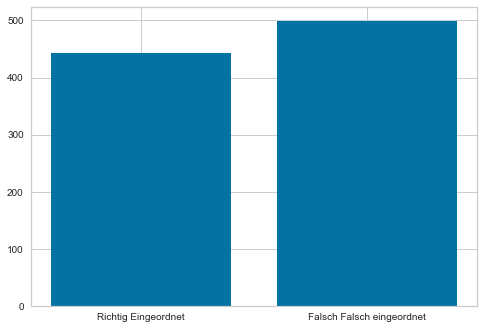

In [27]:
plt.bar(["Richtig Eingeordnet","Falsch Falsch eingeordnet"],[pred_right,pred_wrong])
plt.show()

Von den 942 Daten aus den unbekannten Datensatz konnten gerade einmal 443 richtig klassifiziert werden. Dies bedeutet, dass es sich kein gutes Modell handelt. Die Frage ist, ob sich die die Genauigkeit mit mehr Daten verbessern lässt. Um dies zu überprüfen, werden zwei weiter Modelle generiert. Diesmal wird die Fragestellung allerdings dahingegen angepasst, ob das Lied zum Genre X gehört oder nicht. Damit würde es sich um eine Binäre Klassifikation handeln. 

Der Datensatz wird mit den Tabellen *is\_metal* und *is\_alternative* erweitert (1 = ja, 0 = nein), da dieses Genre am besten zugeordnet werden konnten bzw. am schlechtesten. 

In [28]:
metal = []
alternativ = []

for i in df["genre"]:
    if i == "metal":
        metal.append(1)
        alternativ.append(0)
    elif i == "alternative":
        alternativ.append(1)
        metal.append(0)
    else:
        alternativ.append(0)
        metal.append(0)
df["is_metal"]=metal
df["is_alternativ"]=alternativ

In [29]:
df.head()

,id,titel,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_metal,is_alternativ
0,001U2oRRZXrLbeOJMduXSc,PAPARAZZI,party,0.841,0.558,E,-5.028,1,0.1880,0.128000,0.003610,0.1020,0.516,75.005,148000,4,0,0
1,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,rock,0.352,0.911,C#,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,222973,4,0,0
2,00FRYCC99BHS1ewIqteTwh,hunger,indie_alt,0.586,0.740,D,-6.132,1,0.0398,0.311000,0.000353,0.0878,0.473,145.871,191297,4,0,0
3,00OQVltax4uGNaXHfAlj2Y,Honey,alternative,0.434,0.758,C#,-9.313,1,0.0346,0.000109,0.110000,0.2090,0.245,100.030,183642,4,0,1
4,00QhDAu0EO28Knjq4C3Nhk,Vergessen,rock,0.558,0.829,F#,-5.426,1,0.0354,0.001930,0.000031,0.5160,0.961,160.031,141022,4,0,0


**Metal Song**

Das Vorgehen bleibt dasselbe, wie beim ersten Modell. Diesmal wird allerdings zusätzlich das Feature *genre* nicht mit berücksichtig, da anhand der Informationen aus diesem Feature genau gesagt werden kann, ob es sich um ein Metal Song handelt oder nicht. 

In [30]:
data, data_unseen = split_data(df)

Data for Modeling: (8474, 18)
Unseen Data For Predictions: (942, 18)


In [31]:
exp_clf = setup(data,target="is_metal",session_id=21,ignore_features = ["id","titel","genre","is_alternativ"],fix_imbalance=True)

,Description,Value
0,session_id,21
1,Target,is_metal
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8474, 18)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9100,0.9248,0.6251,0.7012,0.6603,0.6087,0.6104,0.3190
lightgbm,Light Gradient Boosting Machine,0.9069,0.9306,0.6442,0.6774,0.6590,0.6053,0.6064,0.1480
rf,Random Forest Classifier,0.9057,0.9296,0.6730,0.6613,0.6666,0.6118,0.6121,0.5810
gbc,Gradient Boosting Classifier,0.8982,0.9263,0.6923,0.6238,0.6557,0.5961,0.5976,1.0480
ada,Ada Boost Classifier,0.8791,0.9075,0.6622,0.5591,0.6054,0.5347,0.5380,0.2570
dummy,Dummy Classifier,0.8597,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
dt,Decision Tree Classifier,0.8501,0.7355,0.5769,0.4731,0.5191,0.4315,0.4349,0.0580
ridge,Ridge Classifier,0.8027,0.0000,0.8679,0.4066,0.5535,0.4478,0.5008,0.0130
lda,Linear Discriminant Analysis,0.8024,0.8972,0.8679,0.4061,0.5530,0.4472,0.5003,0.0300
knn,K Neighbors Classifier,0.6677,0.6437,0.5144,0.2151,0.3031,0.1311,0.1525,0.0580


Nach dem alle Modelle miteinander verglichen wurden, erzielt das *Extra Trees Classifier* Modell die größte Genauigkeit von 91%, gefolgt von dem lgbm Modell mit einer Genauigkeit von 90,7%.

In [33]:
et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9040,0.9206,0.6190,0.6753,0.6460,0.5906,0.5913
1,0.9005,0.8923,0.5542,0.6765,0.6093,0.5529,0.5565
2,0.9174,0.9284,0.6506,0.7297,0.6879,0.6405,0.6419
3,0.9039,0.9336,0.5783,0.6857,0.6275,0.5727,0.5755
4,0.9157,0.9248,0.6627,0.7143,0.6875,0.6388,0.6394
5,0.9241,0.9427,0.6386,0.7794,0.7020,0.6590,0.6633
6,0.9191,0.9534,0.7108,0.7108,0.7108,0.6638,0.6638
7,0.9073,0.9259,0.6386,0.6795,0.6584,0.6048,0.6052
8,0.9089,0.9280,0.6145,0.6986,0.6538,0.6017,0.6033


In [34]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8384,0.9089,0.7619,0.4571,0.5714,0.4794,0.5032
1,0.8516,0.8875,0.7349,0.4803,0.5810,0.4956,0.5121
2,0.8702,0.9167,0.7831,0.5242,0.6280,0.5531,0.5694
3,0.8735,0.9345,0.8313,0.5308,0.6479,0.5753,0.5969
4,0.8651,0.9270,0.8313,0.5111,0.6330,0.5561,0.5808
5,0.8567,0.9231,0.8193,0.4928,0.6154,0.5339,0.5600
6,0.8735,0.9401,0.8675,0.5294,0.6575,0.5855,0.6123
7,0.8415,0.9150,0.7711,0.4604,0.5766,0.4866,0.5111
8,0.8634,0.9164,0.8193,0.5075,0.6267,0.5487,0.5723


In [35]:
lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9074,0.9293,0.6905,0.6667,0.6784,0.6243,0.6244
1,0.8887,0.9084,0.4940,0.6308,0.5541,0.4915,0.4963
2,0.9241,0.9397,0.7229,0.7317,0.7273,0.6832,0.6832
3,0.9056,0.9483,0.6506,0.6667,0.6585,0.6038,0.6038
4,0.9174,0.9273,0.6988,0.7073,0.7030,0.6550,0.6551
5,0.9258,0.9423,0.6988,0.7532,0.7250,0.6822,0.6828
6,0.8904,0.9448,0.6506,0.6000,0.6243,0.5602,0.5609
7,0.9056,0.9299,0.5663,0.7015,0.6267,0.5733,0.5776
8,0.9089,0.9333,0.6627,0.6790,0.6707,0.6179,0.6180


In [36]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8939,0.9259,0.6429,0.6207,0.6316,0.5697,0.5698
1,0.9022,0.9155,0.5542,0.6866,0.6133,0.5581,0.5623
2,0.9224,0.9342,0.6867,0.7403,0.7125,0.6677,0.6684
3,0.9073,0.9451,0.6627,0.6707,0.6667,0.6128,0.6128
4,0.9106,0.9348,0.6265,0.7027,0.6624,0.6111,0.6124
5,0.9224,0.9335,0.6386,0.7681,0.6974,0.6533,0.6570
6,0.9089,0.9490,0.6867,0.6706,0.6786,0.6255,0.6256
7,0.9106,0.9260,0.5301,0.7586,0.6241,0.5752,0.5871
8,0.9106,0.9360,0.6506,0.6923,0.6708,0.6192,0.6196


Nach dem Erstellen und Anpassen der Hyperparametern der Modelle hat sich die Genauigkeit des Extra Trees Classifier um fast 6% verschlechtert, während die Genauigkeit des lgbm Modells unverändert blieb. 

**Plot**

Anhand des Classification Reports lässt sich erkennen, dass fast 96% aller nicht Metal Songs, auch nicht als Lied aus dem Genre Metal zugeordnet wurde. Trotzdem wurden gerade mal 63% aller Metal Songs auch der Klasse *Metal* zugeordnet. Wenn ein Lied als Metal Song klassifiziert wurde, ist dies in 70% der Fälle richtig. 

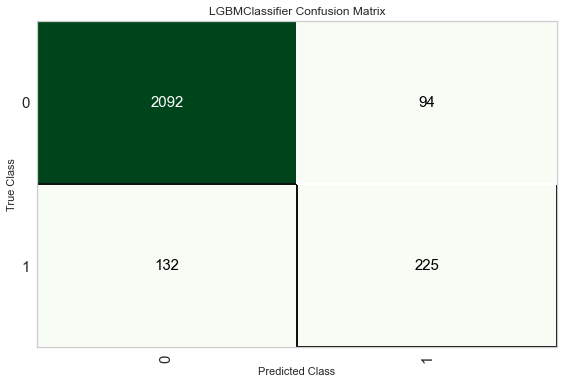

In [37]:
plot_model(tuned_lgbm,plot="confusion_matrix")

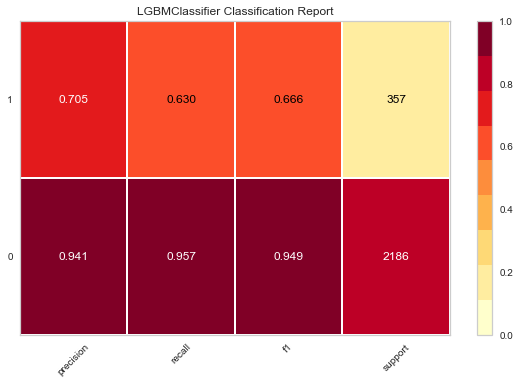

In [38]:
plot_model(tuned_lgbm,plot="class_report")

**Vorhersage**

Mit den Testdaten wurden 91% der Daten richtig klassifiziert. Allerdings konnten gerade mal 63% der Metal Songs auch dem Metal Genre zugeordnet werden und wenn es ein Lied als Metal Song klassifiziert hatte, war dies in 70% der fällen richtig. 

In [39]:
predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9111,0.9345,0.6303,0.7053,0.6657,0.6146,0.6159


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_G,key_G#,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,is_metal,Label,Score
0,0.831,0.457,-8.844,0.1250,0.468000,0.546000,0.1260,0.5590,127.989998,158106.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.9999
1,0.422,0.901,-6.655,0.0631,0.000092,0.000007,0.5600,0.6730,112.445000,194587.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.5105
2,0.628,0.881,-7.754,0.0761,0.003320,0.000000,0.3970,0.5890,100.037003,207448.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7796
3,0.511,0.947,-4.917,0.0457,0.004430,0.000000,0.1170,0.4940,104.045998,238518.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.5328
4,0.419,0.284,-15.409,0.0481,0.461000,0.006640,0.2630,0.1750,96.889000,270080.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.7877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,0.268,0.867,-4.439,0.0922,0.017100,0.000000,0.1080,0.3010,149.953003,252800.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.6530
2539,0.792,0.661,-5.305,0.0406,0.362000,0.041800,0.2520,0.6000,91.503998,110164.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.9971
2540,0.864,0.755,-6.827,0.1010,0.338000,0.048300,0.0595,0.3270,98.815002,234040.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9912
2541,0.521,0.794,-5.299,0.6390,0.279000,0.000000,0.0760,0.5190,189.768005,173000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9979


In [40]:
final_metal_model = finalize_model(tuned_lgbm)

In [41]:
unseen_predict = predict_model(final_metal_model,data=data_unseen)
unseen_predict.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8981,0.9384,0.6364,0.6741,0.6547,0.5950,0.5953


,id,titel,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_metal,is_alternativ,Label,Score
0,00YMhO4tBg7dEvZI8ZJlhE,Trust the Process,edm_dance,0.739,0.643,G,-9.029,1,0.0642,0.010700,0.9230,0.0951,0.368,125.011,357120,4,0,0,0,0.9953
1,01J7GlzTYwAp0kHGwLrHiB,For A Moment,edm_dance,0.651,0.556,F#,-9.001,0,0.0395,0.000803,0.9020,0.0528,0.141,121.001,356529,4,0,0,0,0.9736
2,02RkunUrCBLE5J6jY56QH3,Never Say Never,indie_alt,0.601,0.789,E,-8.730,1,0.0611,0.000596,0.1040,0.2480,0.923,156.459,353667,4,0,0,0,0.9283
3,02itaCXOdC54J0ISjqqFAp,All Around The World (La La La),party,0.733,0.859,A,-5.030,0,0.0330,0.479000,0.0645,0.1050,0.520,124.948,147840,4,0,0,0,0.9974
4,04cMUwER7r2VwqMCj4kYJ9,Devil Eyes,edm_dance,0.730,0.757,D,-7.379,1,0.0989,0.001890,0.8330,0.1570,0.259,102.378,136652,4,0,0,0,0.9937


Das fertige Modell konnte von den 942 Daten 846 richtig zuordnen

In [42]:
pred_wrong = len(unseen_predict.loc[unseen_predict["is_metal"] != unseen_predict["Label"]])
pred_right = len(unseen_predict.loc[unseen_predict["is_metal"] == unseen_predict["Label"]])

print(F"Es wurden {pred_right} Genres richtig eingeordnet")
print(F"Es wurden {pred_wrong} Genres falsch eingeordnet")

Es wurden 846 Genres richtig eingeordnet
Es wurden 96 Genres falsch eingeordnet


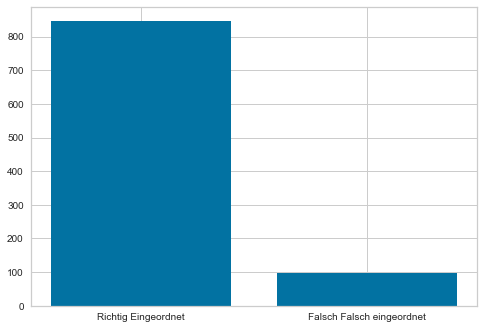

In [43]:
plt.bar(["Richtig Eingeordnet","Falsch Falsch eingeordnet"],[pred_right,pred_wrong])
plt.show()

**Alternative**

In [45]:
df.groupby("is_alternativ").size()

is_alternativ
0    8225
1    1191
dtype: int64

Der Ablauf ist derselben wie beim zweiten Modell. Da die Daten erneut nicht aus balanciert sind, muss PyCaret die Daten wieder synthetisch ausbalancieren.

In [46]:
exp_clf = setup(data,target="is_alternativ",session_id=21,ignore_features = ["id","titel","genre","is_metal"],fix_imbalance=True)

,Description,Value
0,session_id,21
1,Target,is_alternativ
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8474, 18)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [47]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8778,0.6978,0.1508,0.5560,0.2336,0.1906,0.2406,0.1550
gbc,Gradient Boosting Classifier,0.8771,0.6497,0.0781,0.6327,0.1368,0.1103,0.1857,1.0740
et,Extra Trees Classifier,0.8756,0.6612,0.1037,0.5107,0.1706,0.1352,0.1869,0.3970
rf,Random Forest Classifier,0.8747,0.6717,0.0903,0.4976,0.1507,0.1177,0.1693,0.6010
dummy,Dummy Classifier,0.8747,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110
ada,Ada Boost Classifier,0.8383,0.6150,0.1657,0.2673,0.2024,0.1190,0.1238,0.2640
dt,Decision Tree Classifier,0.7668,0.5521,0.2665,0.1903,0.2218,0.0891,0.0911,0.0470
nb,Naive Bayes,0.7358,0.5731,0.2840,0.1685,0.2113,0.0648,0.0682,0.0140
ridge,Ridge Classifier,0.6559,0.0000,0.5480,0.1931,0.2853,0.1228,0.1519,0.0140
lda,Linear Discriminant Analysis,0.6550,0.6567,0.5467,0.1925,0.2844,0.1216,0.1504,0.0280


In [48]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8855,0.7143,0.1733,0.6842,0.2766,0.2377,0.3054
1,0.8803,0.6797,0.1486,0.5789,0.2366,0.1955,0.2500
2,0.8617,0.7216,0.1622,0.3750,0.2264,0.1634,0.1808
3,0.8904,0.7346,0.2703,0.6452,0.3810,0.3317,0.3698
4,0.8803,0.6674,0.0946,0.6364,0.1647,0.1368,0.2128
5,0.8735,0.6893,0.1486,0.4783,0.2268,0.1782,0.2149
6,0.8752,0.6802,0.1486,0.5000,0.2292,0.1824,0.2229
7,0.8887,0.7455,0.1622,0.7500,0.2667,0.2326,0.3150
8,0.8735,0.6834,0.1067,0.5000,0.1758,0.1375,0.1871


In [49]:
tuned_lgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8822,0.6662,0.1067,0.7273,0.1860,0.1589,0.2486
1,0.8718,0.6736,0.0270,0.3333,0.0500,0.0319,0.0638
2,0.8752,0.6321,0.0676,0.5000,0.1190,0.0921,0.1487
3,0.8836,0.7149,0.0676,1.0000,0.1266,0.1126,0.2442
4,0.8836,0.6510,0.0811,0.8571,0.1481,0.1294,0.2422
5,0.8786,0.6622,0.0676,0.6250,0.1220,0.1000,0.1770
6,0.8786,0.6787,0.0405,0.7500,0.0769,0.0650,0.1559
7,0.8803,0.6970,0.0541,0.8000,0.1013,0.0868,0.1884
8,0.8820,0.6618,0.0800,0.8571,0.1463,0.1275,0.2403


In [50]:
gbc = create_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8788,0.6203,0.1067,0.6154,0.1818,0.1501,0.2203
1,0.8718,0.6724,0.0541,0.4000,0.0952,0.0675,0.1091
2,0.8617,0.6371,0.0811,0.3000,0.1277,0.0787,0.0990
3,0.8820,0.6999,0.0541,1.0000,0.1026,0.0909,0.2182
4,0.8803,0.6431,0.0811,0.6667,0.1446,0.1208,0.2035
5,0.8786,0.6555,0.0946,0.5833,0.1628,0.1326,0.1994
6,0.8786,0.6491,0.0946,0.5833,0.1628,0.1326,0.1994
7,0.8836,0.6993,0.0811,0.8571,0.1481,0.1294,0.2422
8,0.8803,0.6248,0.0800,0.7500,0.1446,0.1232,0.2194


In [51]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8805,0.6876,0.1067,0.6667,0.1839,0.1545,0.2336
1,0.8769,0.6906,0.0946,0.5385,0.1609,0.1284,0.1874
2,0.8634,0.6629,0.0946,0.3333,0.1474,0.0976,0.1209
3,0.8870,0.7285,0.1622,0.7059,0.2637,0.2277,0.3021
4,0.8786,0.6649,0.0811,0.6000,0.1429,0.1166,0.1883
5,0.8803,0.6933,0.1216,0.6000,0.2022,0.1672,0.2316
6,0.8769,0.6927,0.1216,0.5294,0.1978,0.1586,0.2103
7,0.8786,0.7120,0.0676,0.6250,0.1220,0.1000,0.1770
8,0.8769,0.6693,0.0800,0.6000,0.1412,0.1148,0.1866


Nach dem Evaluieren der Modelle und dem Anpassen der Hyperparametern hat das lgbm Modell konnte das lgbm Modell die beste Genauigkeit erzielen.

**Plot**

Wie man in der Confusion Matrix erkennt, wurden wenig Lieder aus dem Alternativ Genre auch als Alternativ klassifiziert. 7% aller Alternative Songs wurden auch als Alternative erkannt, wie es der Recall aus dem Class Report zeigt.  Allerdings waren fast 80% aller Songs die als Alternative klassifiziert wurden auch Lieder aus diesem Genre.

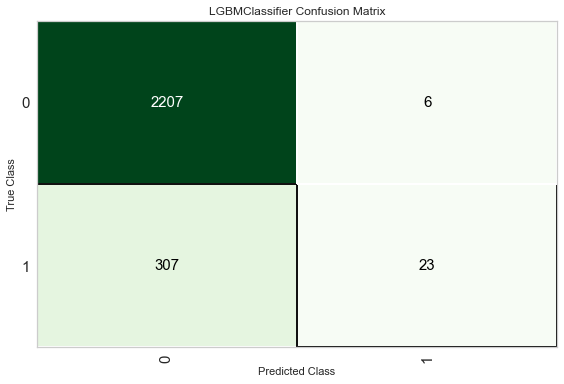

In [52]:
plot_model(tuned_lgbm,plot="confusion_matrix")

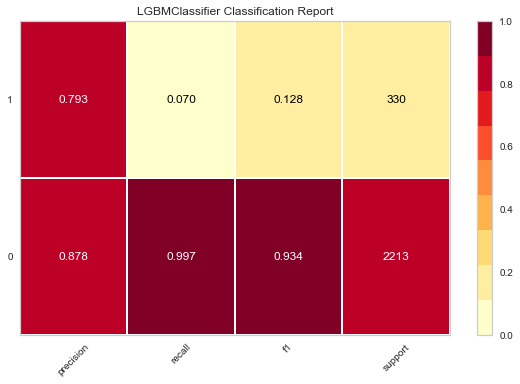

In [53]:
plot_model(tuned_lgbm,plot="class_report")

**Vorhersage**

Die Vorhersage mit den Testdaten bestätigt die Aussagen aus dem Class Report. Zwar ist das Modell zu fas 88% genau, allerdings wurden gerade einmal fast 7% aller Alternative Songs richtig klassifiziert. 

In [54]:
predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8769,0.7088,0.0697,0.7931,0.1281,0.1095,0.2120


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_G,key_G#,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,is_alternativ,Label,Score
0,0.831,0.457,-8.844,0.1250,0.468000,0.546000,0.1260,0.5590,127.989998,158106.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.6744
1,0.422,0.901,-6.655,0.0631,0.000092,0.000007,0.5600,0.6730,112.445000,194587.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7098
2,0.628,0.881,-7.754,0.0761,0.003320,0.000000,0.3970,0.5890,100.037003,207448.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7275
3,0.511,0.947,-4.917,0.0457,0.004430,0.000000,0.1170,0.4940,104.045998,238518.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7374
4,0.419,0.284,-15.409,0.0481,0.461000,0.006640,0.2630,0.1750,96.889000,270080.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.5854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,0.268,0.867,-4.439,0.0922,0.017100,0.000000,0.1080,0.3010,149.953003,252800.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6913
2539,0.792,0.661,-5.305,0.0406,0.362000,0.041800,0.2520,0.6000,91.503998,110164.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.6753
2540,0.864,0.755,-6.827,0.1010,0.338000,0.048300,0.0595,0.3270,98.815002,234040.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6336
2541,0.521,0.794,-5.299,0.6390,0.279000,0.000000,0.0760,0.5190,189.768005,173000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7055


In [55]:
final_alternativ_model = finalize_model(tuned_lgbm)

Das Modell zur klassifizierung, ob ein Lied dem Alternativ Genre angehört, konnten 824 Daten von den insgesamt 942 Daten richtig zugeordnet werden.

In [56]:
unseen_predict = predict_model(final_alternativ_model,data=data_unseen)
unseen_predict.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8747,0.7056,0.0339,0.5000,0.0635,0.0484,0.1048


,id,titel,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_metal,is_alternativ,Label,Score
0,00YMhO4tBg7dEvZI8ZJlhE,Trust the Process,edm_dance,0.739,0.643,G,-9.029,1,0.0642,0.010700,0.9230,0.0951,0.368,125.011,357120,4,0,0,0,0.6355
1,01J7GlzTYwAp0kHGwLrHiB,For A Moment,edm_dance,0.651,0.556,F#,-9.001,0,0.0395,0.000803,0.9020,0.0528,0.141,121.001,356529,4,0,0,0,0.6734
2,02RkunUrCBLE5J6jY56QH3,Never Say Never,indie_alt,0.601,0.789,E,-8.730,1,0.0611,0.000596,0.1040,0.2480,0.923,156.459,353667,4,0,0,0,0.5970
3,02itaCXOdC54J0ISjqqFAp,All Around The World (La La La),party,0.733,0.859,A,-5.030,0,0.0330,0.479000,0.0645,0.1050,0.520,124.948,147840,4,0,0,0,0.7316
4,04cMUwER7r2VwqMCj4kYJ9,Devil Eyes,edm_dance,0.730,0.757,D,-7.379,1,0.0989,0.001890,0.8330,0.1570,0.259,102.378,136652,4,0,0,0,0.6578


In [57]:
pred_wrong = len(unseen_predict.loc[unseen_predict["is_alternativ"] != unseen_predict["Label"]])
pred_right = len(unseen_predict.loc[unseen_predict["is_alternativ"] == unseen_predict["Label"]])

print(F"Es wurden {pred_right} Genres richtig eingeordnet")
print(F"Es wurden {pred_wrong} Genres falsch eingeordnet")

Es wurden 824 Genres richtig eingeordnet
Es wurden 118 Genres falsch eingeordnet


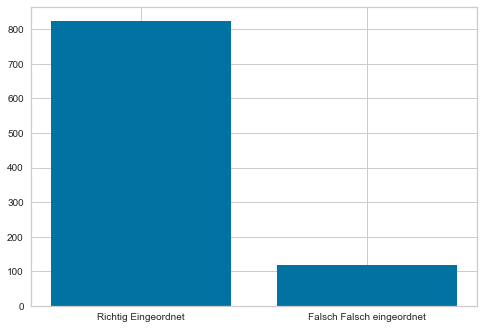

In [58]:
plt.bar(["Richtig Eingeordnet","Falsch Falsch eingeordnet"],[pred_right,pred_wrong])
plt.show()

**Speicherung der Modelle**



In [59]:
save_model(final_model,"Finale Multiclass Model 15072022")
save_model(final_metal_model,"Finale Binary Model Metal 15072022")
save_model(final_alternativ_model,"Finale Binary Model Alternativ 15072022")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['id', 'titel', 'genre',
                                                        'is_metal'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='is_alternativ',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 f...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                    

**Fazit**

Es wurden drei Modelle erstellt, eins zur Klassifizierung des Genres eines Liedes und zwei zum Überprüfen, ob ein Lied dem Genre Metal beziehungsweise Alternative angehörte. Das erste Modell konnte eine Genauigkeit von 48% erzielen. Trotz der geringen Genauigkeit konnte das Modell gut zwischen Genres unterscheiden, die sich Stark voneinander unterscheiden. So wurden so gut wie kaum Lieder aus dem Pop Genre, fälschlicherweise dem Metal Genre zugewiesen. Größer Probleme, gab es allerdings bei Genre, die in eine selbe Richtung gehen. Es hat zum Beispiel größere Probleme dabei, ein Song zwischen Metal und Rock zu unterscheiden. Dies zeigt das letzte Modell auch nochmal. Es konnten zwar viele Lieder richtig klassifizieren, hatte aber Probleme damit eigentliche Alternative Lieder auch als diese zu Klassifizieren. Dies könnte sich unteranderem dadurch erklären lassen, dass es sich bei dem Genre mehr um ein Sub-Genre des Metal und Rock Genre handelt. Daher wäre interessant zu sehen, wie sich die Genauigkeit des ersten Modelles verändern würde, wenn der Fokus nur auf Genre liegt, die sich musikalisch stark voneinander unterscheiden. 

Des Weiteren wurde nicht berücksichtig, dass Songs mehreren Genres angehören können. Bei der Datenerhebung wurden die Lieder dem Genre zugewiesen, in dem sie häufiger vertreten sind. In der heutigen Musik ist allerdings nicht unüblich, dass sich unterschiedliche Genres miteinander vermischen und ein Lied sowohl als Pop Song gelten kann, gleichzeitig aber auch als EDM-Dance Song. Dieser Faktor wurde beim Modell und der Datenerhebung nicht berücksichtig. 